In [2]:
import librosa
import librosa.display
from glob import glob
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import IPython.display as ipd
from itertools import cycle

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM

In [ ]:
sns.set_theme()

In [2]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.1


In [5]:
audio_files = glob("Extracted_data/*/*/cough-heavy.wav")

In [6]:
ipd.Audio(audio_files[0])

In [11]:
y,sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}, y.shape: {y.shape}, sr: {sr}')

y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], y.shape: (114778,), sr: 22050


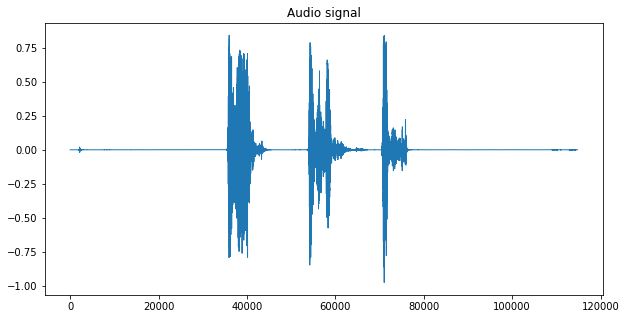

In [14]:
pd.Series(y).plot(figsize=(10, 5), title="Audio signal", lw=1)
plt.show()

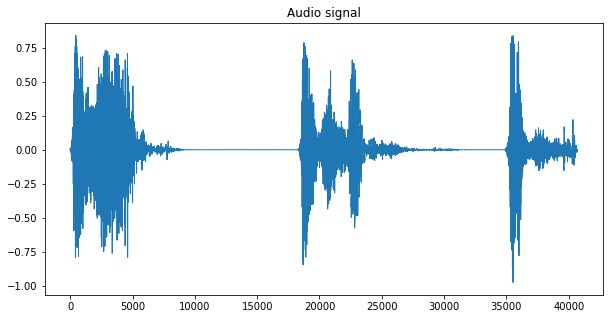

In [29]:
y_trim,_ = librosa.effects.trim(y, top_db=20, frame_length=512, hop_length=64)
pd.Series(y_trim).plot(figsize=(10, 5), title="Audio signal", lw=1)
plt.show()


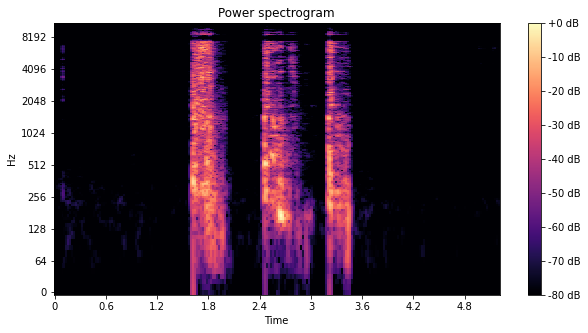

In [28]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig,ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format='%+2.0f dB')
plt.show()

C:\Users\ganji\AppData\Local\Temp\ipykernel_14712\1915683725.py:1: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.4341929e-06
  4.5103203e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128, fmax=8000)


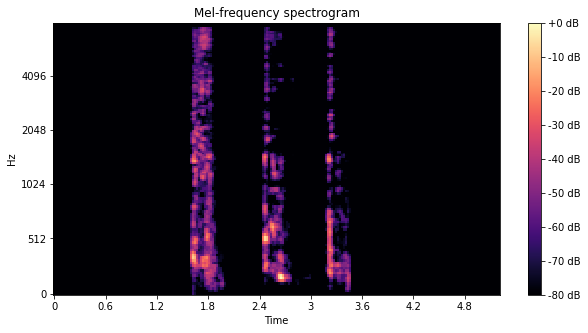

In [38]:
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128, fmax=8000)
S_dB_mel = librosa.amplitude_to_db(S, ref=np.max)
fig,ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_dB_mel, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)
ax.set_title('Mel-frequency spectrogram')
fig.colorbar(img, ax=ax, format='%+2.0f dB')
plt.show()

In [39]:
S_dB_mel

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)